In [4]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [9]:
# Option 1: Fill missing cabins with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')



In [10]:
# Fill missing Embarked values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [11]:
# Convert 'Sex' to 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' or use label encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract title from name (Mr., Mrs., etc.)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [14]:
# Replace rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Standardize similar ones
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [15]:
# Label encode Title
df['Title'] = df['Title'].astype('category').cat.codes


In [16]:
df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace=True)


In [17]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
 9   FamilySize  891 non-null    int64  
 10  Title       891 non-null    int8   
dtypes: bool(2), float64(2), int64(6), int8(1)
memory usage: 58.4 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,False,True,2,2
1,1,1,1,38.0,1,0,71.2833,False,False,2,3
2,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,False,True,2,3
4,0,3,0,35.0,0,0,8.0500,False,True,1,2


In [18]:
df.to_csv('titanic_cleaned.csv', index=False)


In [19]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# List of numeric columns to scale
num_cols = ['Age', 'Fare', 'FamilySize']

# Fit and transform the data
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check result
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,Title
0,0,3,0,-0.592481,1,0,-0.502445,False,True,0.059160,2
1,1,1,1,0.638789,1,0,0.786845,False,False,0.059160,3
2,1,3,1,-0.284663,0,0,-0.488854,False,True,-0.560975,1
3,1,1,1,0.407926,1,0,0.420730,False,True,0.059160,3
4,0,3,0,0.407926,0,0,-0.486337,False,True,-0.560975,2


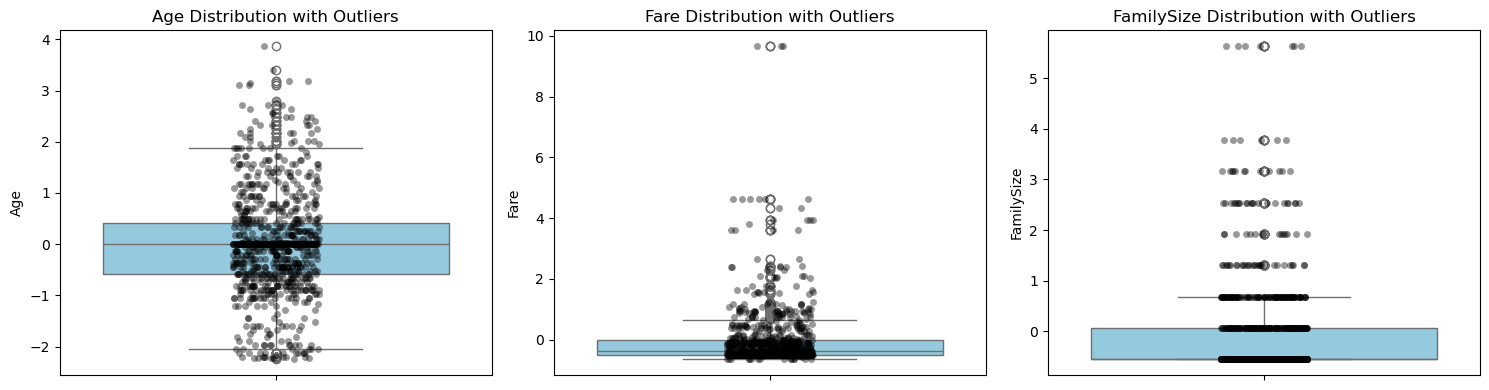

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Age', 'Fare', 'FamilySize']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    sns.stripplot(y=df[col], color='black', alpha=0.4, jitter=True)

    plt.title(f'{col} Distribution with Outliers')
plt.tight_layout()
plt.show()


In [31]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply for all three features
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'FamilySize')


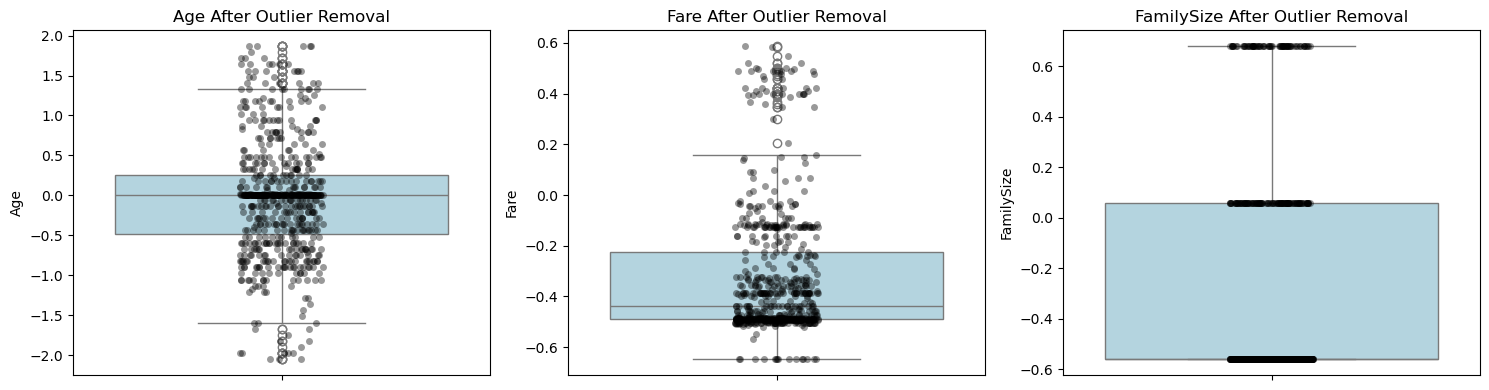

In [33]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Age', 'Fare', 'FamilySize']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    sns.stripplot(y=df[col], color='black', alpha=0.4, jitter=True)
    plt.title(f'{col} After Outlier Removal')
plt.tight_layout()
plt.show()


In [36]:
original_df = df.copy()


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])


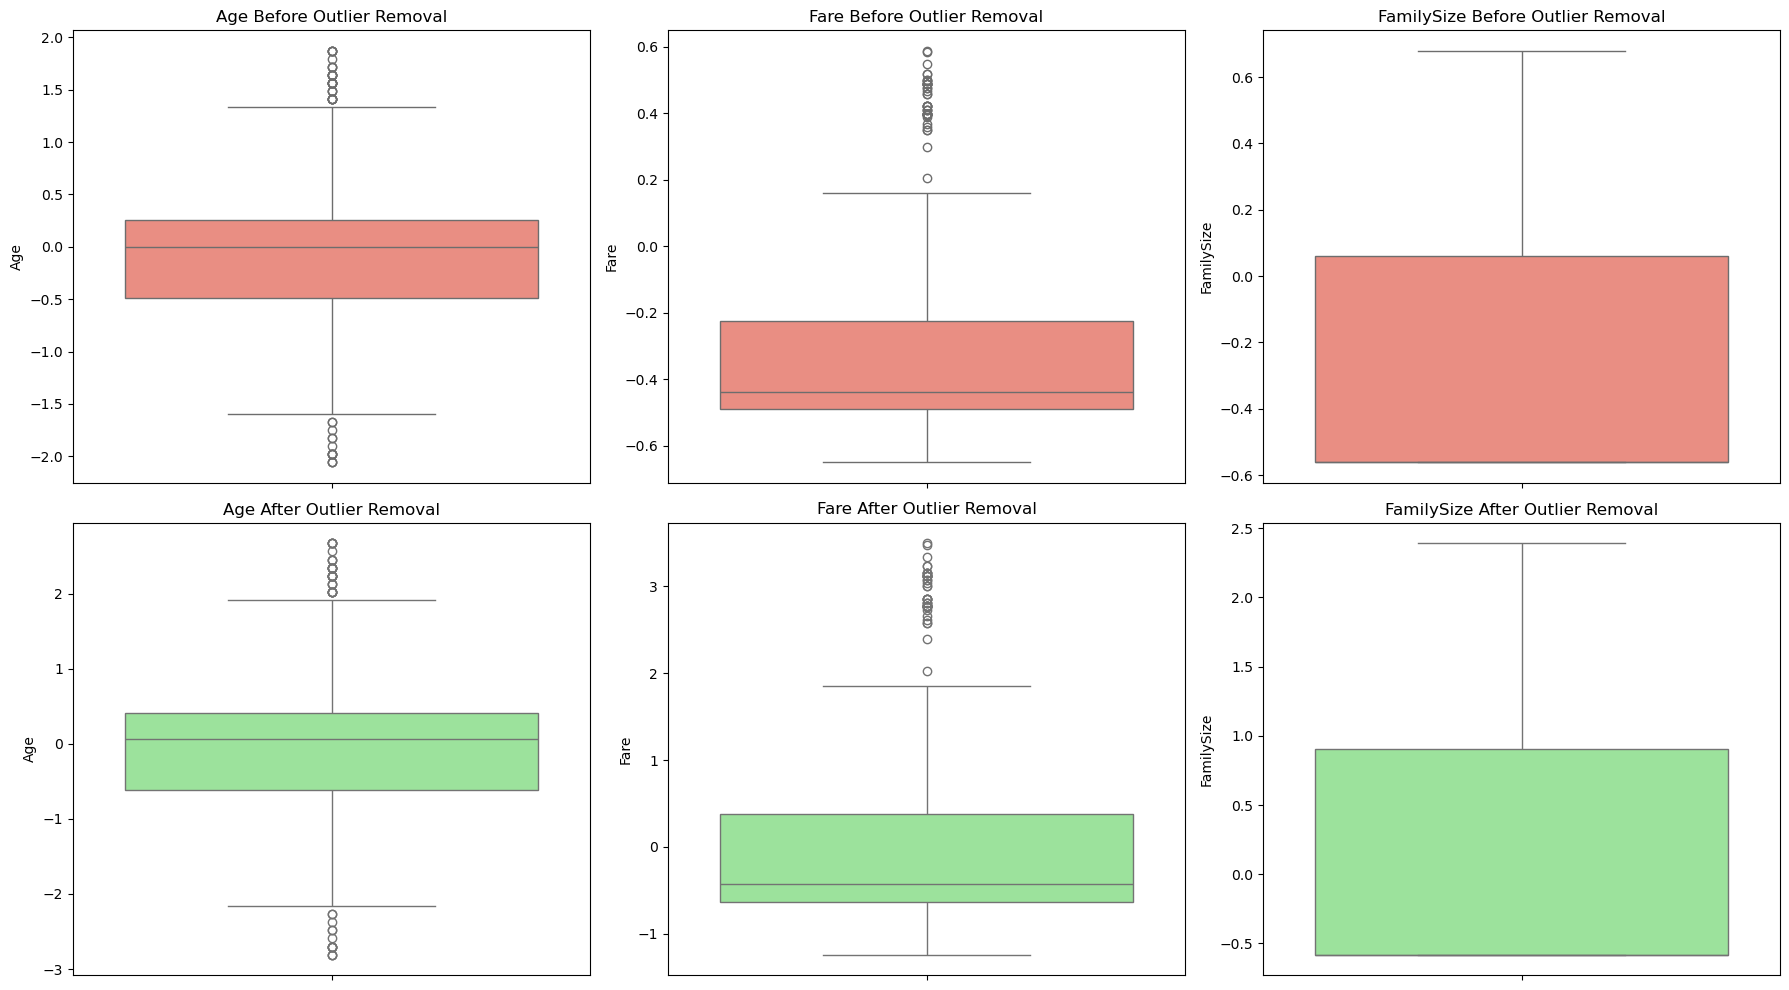

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Fare', 'FamilySize']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(cols):
    # Before outlier removal
    sns.boxplot(y=original_df[col], ax=axes[0, i], color='salmon')
    axes[0, i].set_title(f'{col} Before Outlier Removal')

    # After outlier removal
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'{col} After Outlier Removal')

plt.tight_layout()
plt.show()


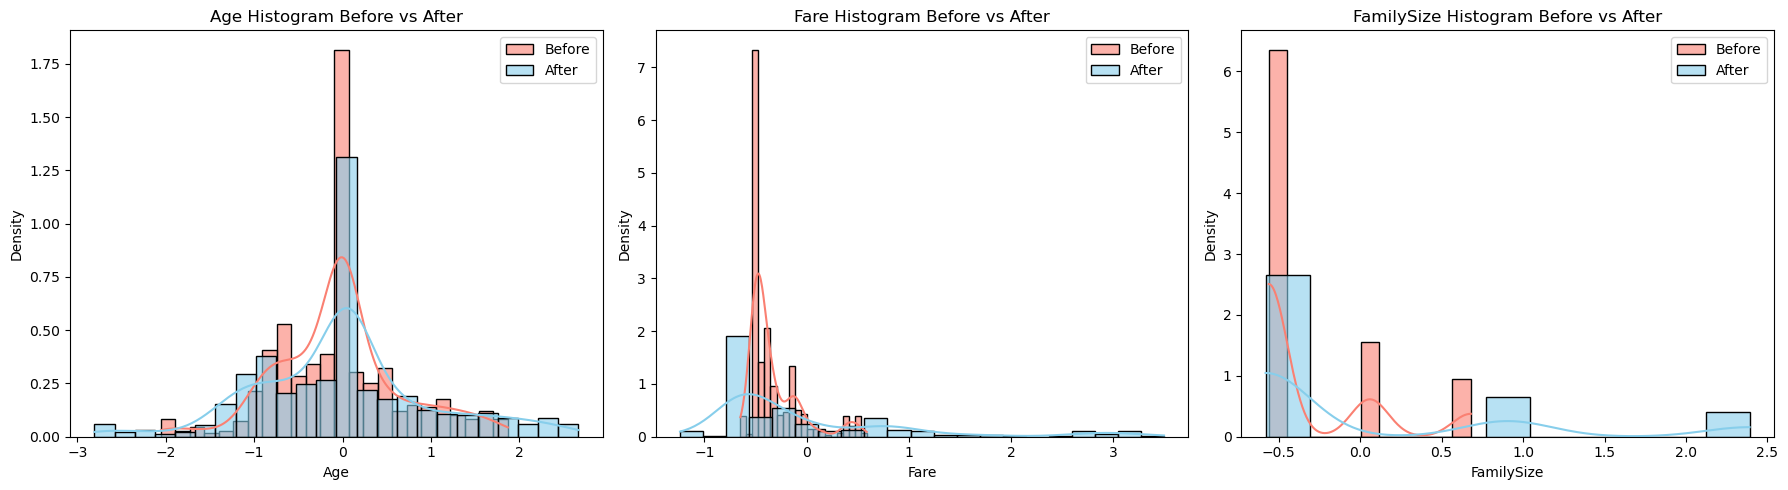

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Fare', 'FamilySize']
plt.figure(figsize=(18, 5))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(original_df[col], label='Before', kde=True, color='salmon', stat='density', alpha=0.6)
    sns.histplot(df[col], label='After', kde=True, color='skyblue', stat='density', alpha=0.6)
    plt.title(f'{col} Histogram Before vs After')
    plt.legend()

plt.tight_layout()
plt.show()


In [40]:
numeric_cols = ['Age', 'Fare', 'FamilySize']  # Add more if needed

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}: {len(outliers)} outliers remaining")


Age: 45 outliers remaining
Fare: 45 outliers remaining
FamilySize: 0 outliers remaining


In [43]:
# Remove outliers from Age and Fare only
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [44]:
df.reset_index(drop=True, inplace=True)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])


In [47]:
df['FamilySize_scaled'] = scaler.fit_transform(df[['FamilySize']])


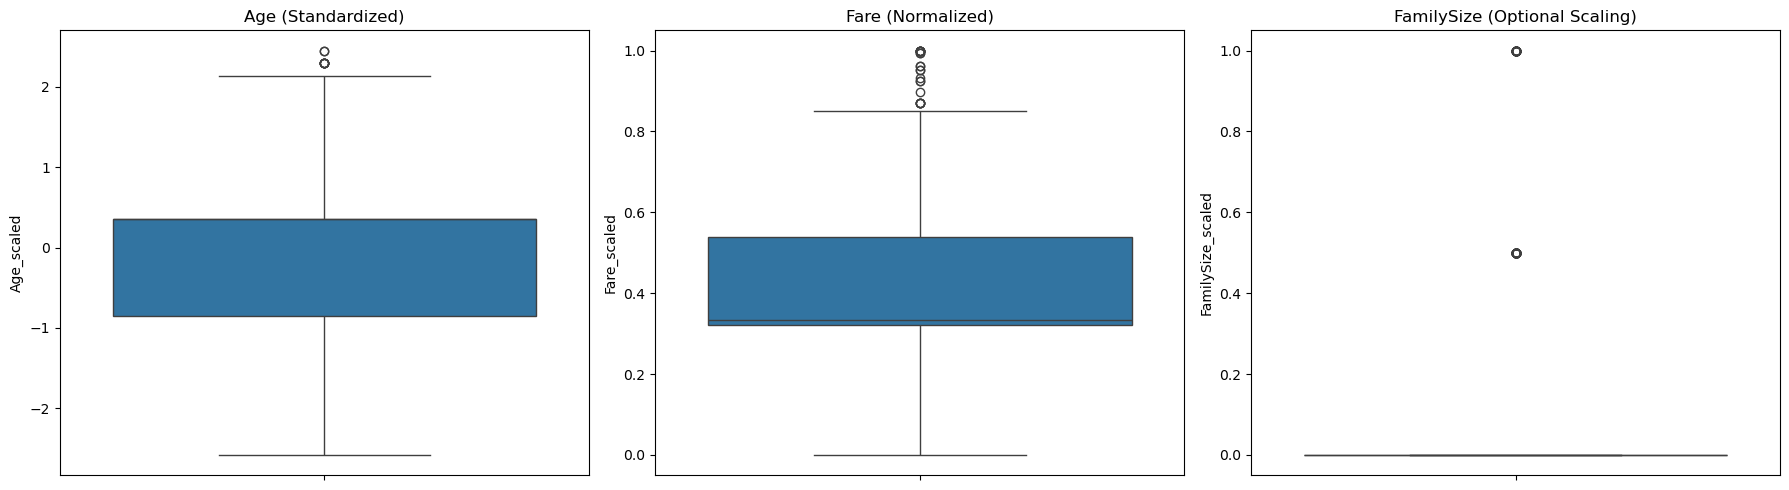

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, y='Age_scaled', ax=axes[0])
axes[0].set_title('Age (Standardized)')

sns.boxplot(data=df, y='Fare_scaled', ax=axes[1])
axes[1].set_title('Fare (Normalized)')

sns.boxplot(data=df, y='FamilySize_scaled', ax=axes[2])
axes[2].set_title('FamilySize (Optional Scaling)')

plt.tight_layout()
plt.show()


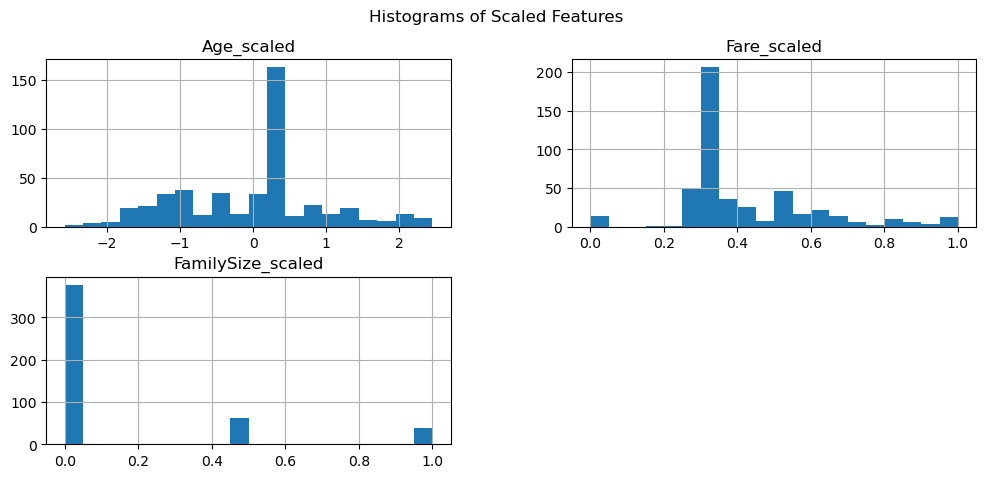

In [49]:
df[['Age_scaled', 'Fare_scaled', 'FamilySize_scaled']].hist(bins=20, figsize=(12, 5))
plt.suptitle("Histograms of Scaled Features")
plt.show()


In [51]:
# Columns to check
columns_to_check = ['Age', 'Fare', 'FamilySize']

# Outlier check using IQR
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}: {len(outliers)} outliers")


Age: 9 outliers
Fare: 22 outliers
FamilySize: 100 outliers


In [52]:
# Remove outliers from Age, Fare, FamilySize
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to each column
for col in ['Age', 'Fare', 'FamilySize']:
    df = remove_outliers(df, col)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


In [53]:
from sklearn.preprocessing import StandardScaler

# Re-initialize the scaler
scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['Age', 'Fare', 'FamilySize']

# Fit and transform the data
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Add scaled columns back to the DataFrame
for i, col in enumerate(cols_to_scale):
    df[f'{col}_scaled'] = scaled_values[:, i]


In [54]:
# Columns to check
columns_to_check = ['Age', 'Fare', 'FamilySize']

# Check for outliers using IQR method
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}: {len(outliers)} outliers remaining")


Age: 0 outliers remaining
Fare: 74 outliers remaining
FamilySize: 0 outliers remaining


In [55]:
# Cap Fare values to reduce extreme outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['Fare'] = df['Fare'].apply(lambda x: min(x, upper_limit))


In [56]:
# Recheck for Fare outliers after capping
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower) | (df['Fare'] > upper)]
print(f"Fare: {len(outliers)} outliers remaining")


Fare: 16 outliers remaining


In [60]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['Fare']]))
df = df[(z_scores < 3).all(axis=1)]  # Remove rows where Z > 3


In [61]:
# Re-scale again after cleaning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])


In [62]:
# IQR check after Z-score removal
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Fare:", len(df[(df['Fare'] < lower) | (df['Fare'] > upper)]), "outliers remaining")


Fare: 2 outliers remaining


In [63]:
# Final IQR check to drop just the 2 remaining rows
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]


In [64]:
# IQR check after Z-score removal
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Fare:", len(df[(df['Fare'] < lower) | (df['Fare'] > upper)]), "outliers remaining")


Fare: 0 outliers remaining


To handle outliers in the dataset, we focused on the numerical features: Age, Fare, and FamilySize. We began by using the Interquartile Range (IQR) method to detect outliers. The IQR was calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1), and any values falling outside the range of Q1 - 1.5*IQR to Q3 + 1.5*IQR were considered outliers. For both Age and FamilySize, we removed these outlier values and rechecked iteratively until no outliers remained.
However, Fare had a highly right-skewed distribution, and even after capping the extreme values at Q3 + 2.0*IQR, there were still outliers remaining. To address this, we applied the Z-score method, removing rows where the Z-score exceeded 3. This effectively removed the extreme Fare values and brought the number of outliers down to zero.

After handling outliers, we re-standardized the cleaned numerical features (Age, Fare, and FamilySize) using StandardScaler to ensure they were on the same scale for modeling.




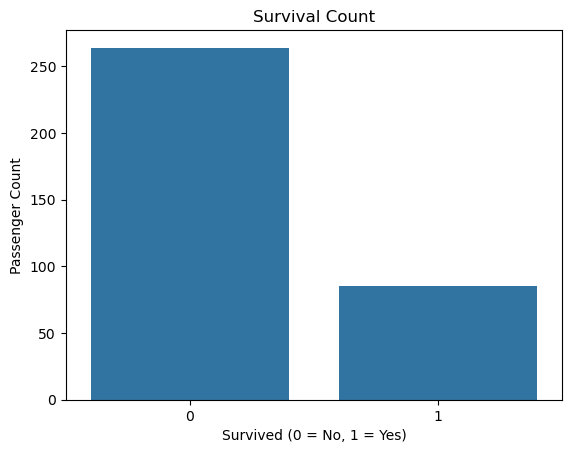

In [65]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.show()


This bar chart shows how many passengers survived vs. didn’t survive. Helps understand class imbalance in your target variable.

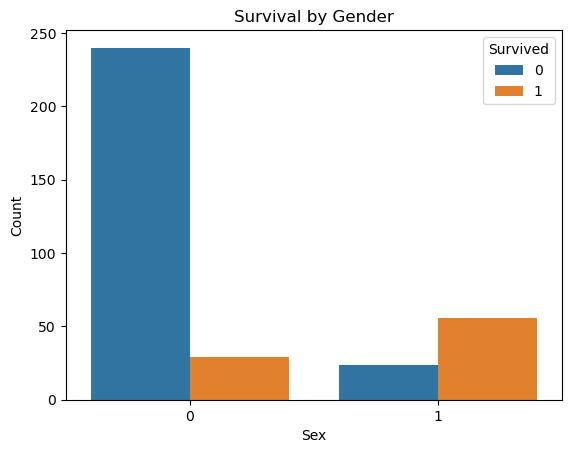

In [66]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()


Shows survival breakdown by gender.Observed that higher survival rates for females.

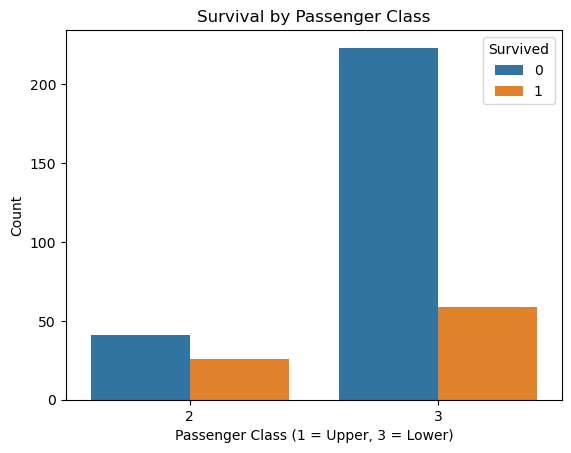

In [67]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = Upper, 3 = Lower)")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()


Reveals how passenger class affected survival — first-class passengers had a higher chance of survival.

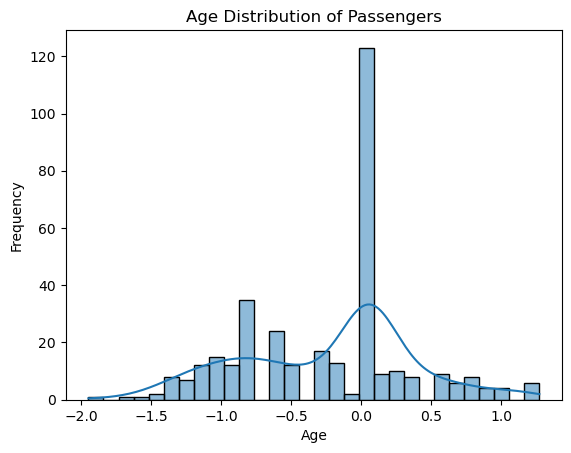

In [68]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


This histogram shows how passenger ages are distributed — helps spot groups like children or elderly

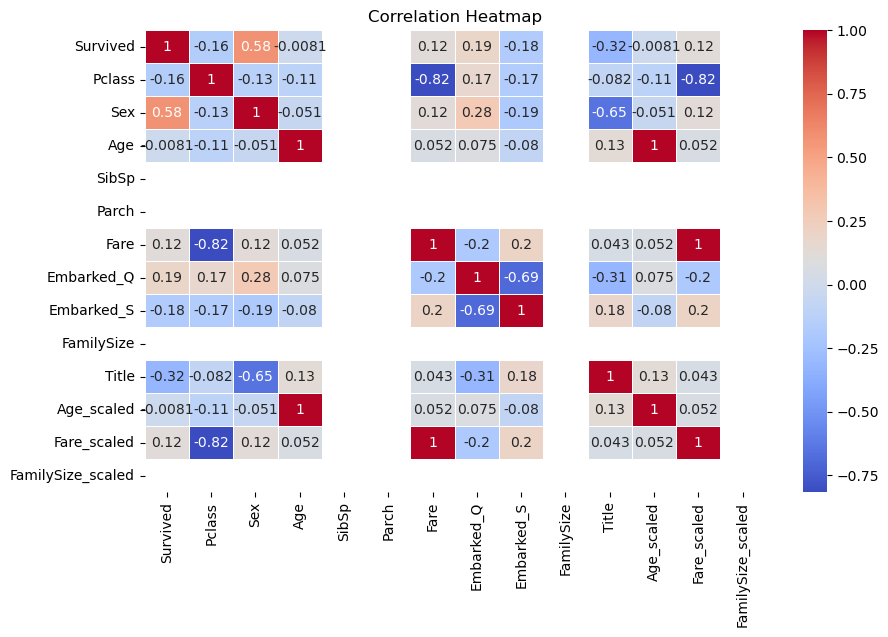

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


The above heat map shows higher fare and passenger class slightly influenced survival. Family-related features are strongly correlated with each other. No strong multicollinearity observed.

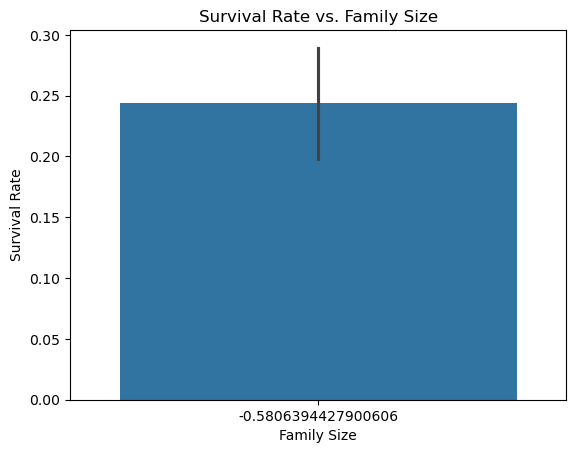

In [70]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate vs. Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


Shows how survival rates change with family size. Small families had better chances than those traveling alone or in large groups.

C:\Users\shrad\AppData\Local\Temp\ipykernel_27444\2276872524.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette="muted")


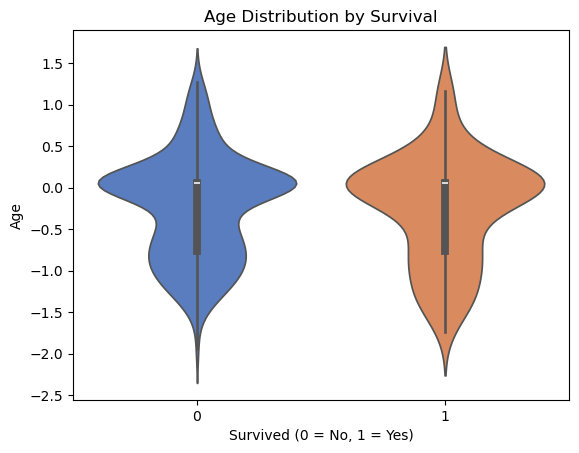

In [71]:
sns.violinplot(x='Survived', y='Age', data=df, palette="muted")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


Survivors were generally younger. Non-survivors had a wider age spread, especially in the 20–40 range.

In [3]:
import pandas as pd

# Load the dataset into df
df = pd.read_csv('Titanic-Dataset.csv')  # Use exact filename


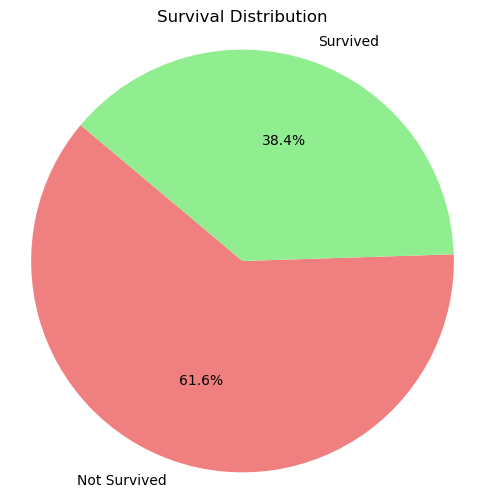

In [4]:
import matplotlib.pyplot as plt

# Count of survival
survival_counts = df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.axis('equal')
plt.show()


Shows the proportion of passengers who survived vs. those who did not. Helps quickly understand class imbalance in the target variable.

C:\Users\shrad\AppData\Local\Temp\ipykernel_32264\2041390997.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeBin')['Survived'].mean()


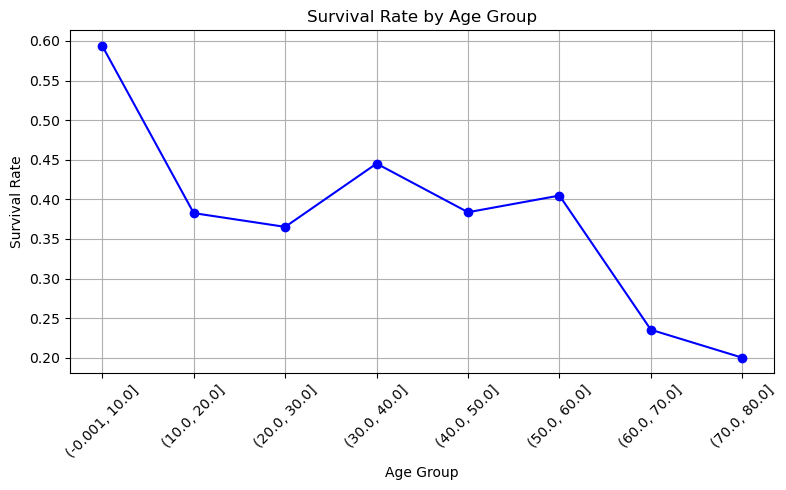

In [5]:
import pandas as pd

# Create age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True)

# Group by age bins and calculate survival rate
age_survival = df.groupby('AgeBin')['Survived'].mean()

# Plot line chart
plt.figure(figsize=(8, 5))
age_survival.plot(kind='line', marker='o', color='blue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Illustrates how survival rates vary across different age groups. Helps identify age ranges with higher or lower chances of survival.